---
title: "Resultados Dashboard con Python"
subtitle: "Créditos agropecuarios y evaluaciones agropecuarias en café"
author: "Edimer David Jaramillo"
format: 
    html:
        toc: true
        number-sections: true
execute: 
  eval: false
---

# Importando bibliotecas

In [38]:
import pandas as pd
import numpy as np
from plotnine import * 

# Importando datos

::: {.panel-tabset}

## Créditos agropecuarios

In [4]:
# Datos de créditos agropecuarios en café
creditos_cafe = pd.read_csv("datos/créditos_café_colombia.csv")
creditos_cafe.head()

,year_es,mes,fuente_colocacion,id_tipo_prod,tipo_productor,valor_inversion,colocacion,id_depto,departamento_inversion,id_munic,...,linea_de_credito,linea_de_produccion,id_rubro,destino_de_credito,genero,percent_fag,vlr_inic_garantia,latitud,longitud,cantidad
0,2021,4,REDESCUENTO,0,PEQUEÑO,10000000.0,10000000,85,CASANARE,85136,...,Inversión,SIEMBRAS (I),141100,141100 Café,H,80.0,8000000.0,6.185278,-72.344444,1
1,2021,4,REDESCUENTO,0,PEQUEÑO,6000000.0,6000000,85,CASANARE,85400,...,Inversión,SIEMBRAS (I),141100,141100 Café,H,80.0,4800000.0,5.829722,-72.163333,1
2,2021,4,REDESCUENTO,0,PEQUEÑO,8000000.0,8000000,17,CALDAS,17013,...,Inversión,SIEMBRAS (I),141100,141100 Café,H,80.0,6400000.0,5.633333,-75.416667,1
3,2021,4,REDESCUENTO,0,PEQUEÑO,25000000.0,20000000,68,SANTANDER,68669,...,Inversión,SIEMBRAS (I),141100,141100 Café,H,NaN,NaN,6.833333,-72.750000,1
4,2021,9,REDESCUENTO,0,PEQUEÑO,9000000.0,9000000,73,TOLIMA,73520,...,Inversión,SIEMBRAS (I),141100,141100 Café,M,80.0,7200000.0,5.133333,-75.033333,1


## Evaluaciones agropecuarias

In [5]:
# Datos de evaluaciones agropecuarias
eva_cafe = pd.read_csv("datos/evas_café.csv")
eva_cafe.head()

,codigo_dane_departamento,departamento,codigo_dane_municipio,municipio,desagregacion_cultivo,cultivo,ciclo_del_cultivo,grupo_cultivo,subgrupo,year_es,periodo,area_sembrada_ha,area_cosechada_ha,produccion_t,rendimiento_t_ha,nombre_cientifico_del_cultivo,codigo_del_cultivo,estado_fisico_del_cultivo
0,5,Antioquia,5001,Medellín,Café,Café,Permanente,Cultivos tropicales tradicionales,Cultivos tropicales tradicionales,2019,2019,465.00,417.00,517.0000,1.24,Coffea arabica,2030300,Pergamino o seco de trilla
1,5,Antioquia,5001,Medellín,Café,Café,Permanente,Cultivos tropicales tradicionales,Cultivos tropicales tradicionales,2020,2020,450.00,394.00,452.0000,1.15,Coffea arabica,2030300,Pergamino o seco de trilla
2,5,Antioquia,5001,Medellín,Café,Café,Permanente,Cultivos tropicales tradicionales,Cultivos tropicales tradicionales,2021,2021,437.58,378.22,276.1006,0.73,Coffea arabica,2030300,Pergamino o seco de trilla
3,5,Antioquia,5001,Medellín,Café,Café,Permanente,Cultivos tropicales tradicionales,Cultivos tropicales tradicionales,2022,2022,420.87,387.08,241.1800,0.62,Coffea arabica,2030300,Pergamino o seco de trilla
4,5,Antioquia,5001,Medellín,Café,Café,Permanente,Cultivos tropicales tradicionales,Cultivos tropicales tradicionales,2023,2023,368.73,335.26,238.6600,0.71,Coffea arabica,2030300,Pergamino o seco de trilla


:::

# Municipios en ambas tablas

- Primero identificamos a partir de cuáles variables podríamos unir las dos bases de datos.
- ¿Unimos los créditos a las EVAs o las EVAs a los créditos? En este caso nos interesan municipios que estén en ambas bases de datos. 
  - ¿Cuántos municipios hay en la base de datos de créditos?
  - ¿Cuántos municipios hay en la base de datos de EVAs?

In [14]:
# Total de municipios direrentes
mpios_unicos_creditos = creditos_cafe["id_munic"].unique()
mpios_unicos_evas = eva_cafe["codigo_dane_municipio"].unique()

print(len(mpios_unicos_creditos))
print(len(mpios_unicos_evas))

717
640


- ¿Cuántos municipios comparten las dos bases de datos?

In [26]:
sum(np.isin(mpios_unicos_creditos, mpios_unicos_evas))

np.int64(623)

# Resumen por municipio

- Para simplificar el ejercicio vamos a calcular algunas métricas estadísticas por municipio.

::: {.panel-tabset}

## Resumen créditos

In [27]:
resumen_creditos = (
    creditos_cafe
    .groupby(
        ["id_depto", "departamento_inversion", "id_munic", "municipio_inversion"]
    )
    .agg(
        promedio_plazo = ("plazo", "mean"),
        promedio_valor = ("vlr_inic_garantia", "mean")
    )
    .reset_index()
)

resumen_creditos.head()

,id_depto,departamento_inversion,id_munic,municipio_inversion,promedio_plazo,promedio_valor
0,5,ANTIOQUIA,5001,MEDELLÍN,67.714286,1.100000e+07
1,5,ANTIOQUIA,5002,ABEJORRAL,79.545455,1.009633e+07
2,5,ANTIOQUIA,5004,ABRIAQUÍ,75.648649,9.169697e+06
3,5,ANTIOQUIA,5021,ALEJANDRÍA,88.168317,1.119543e+07
4,5,ANTIOQUIA,5030,AMAGÁ,70.026316,6.445704e+06


## Resumen EVAs

In [32]:
resumen_evas = (
    eva_cafe
    .groupby(
        ["codigo_dane_departamento", "departamento", "codigo_dane_municipio", "municipio"]
    )
    .agg(
        promedio_rto = ("rendimiento_t_ha", "mean"),
        promedio_pdn = ("produccion_t", "mean")
    )
    .reset_index()
)

resumen_evas.head()

,codigo_dane_departamento,departamento,codigo_dane_municipio,municipio,promedio_rto,promedio_pdn
0,5,Antioquia,5001,Medellín,0.890,344.98812
1,5,Antioquia,5002,Abejorral,1.372,3445.49862
2,5,Antioquia,5004,Abriaquí,1.332,134.02920
3,5,Antioquia,5021,Alejandría,1.214,589.95256
4,5,Antioquia,5030,Amagá,1.222,573.34512


:::

# Unión de datos

- Ahora unimos los dos resúmenes. La unión se realiza teniendo en cuenta la variable municipio, pero es importante tener en cuenta que tienen diferente nombre en cada tabla.

In [33]:
print(resumen_creditos.columns)
print(resumen_evas.columns)

Index(['id_depto', 'departamento_inversion', 'id_munic', 'municipio_inversion',
       'promedio_plazo', 'promedio_valor'],
      dtype='object')
Index(['codigo_dane_departamento', 'departamento', 'codigo_dane_municipio',
       'municipio', 'promedio_rto', 'promedio_pdn'],
      dtype='object')


- **Opcional:** para facilitar el proceso podemos hacer dos cosas antes de unir las bases de datos:
  - Editar los nombres de la variable que es común en ambas tablas y a través de la cual realizamos la unión.
  - Como el nombre del municipio y departamento está en ambas tablas, solo es necesario que lo mantengamos en una tabla, ya que se repetirá.

In [34]:
resumen_evas2 = (
    resumen_evas
    .rename(columns = {"codigo_dane_municipio": "id_munic"})
    .loc[:, ["id_munic", "promedio_rto", "promedio_pdn"]]
)

resumen_evas2.head()

,id_munic,promedio_rto,promedio_pdn
0,5001,0.890,344.98812
1,5002,1.372,3445.49862
2,5004,1.332,134.02920
3,5021,1.214,589.95256
4,5030,1.222,573.34512


- Ahora unimos las dos tablas.

In [36]:
df_completa = pd.merge(resumen_creditos, resumen_evas2, on = "id_munic")
df_completa.head()

,id_depto,departamento_inversion,id_munic,municipio_inversion,promedio_plazo,promedio_valor,promedio_rto,promedio_pdn
0,5,ANTIOQUIA,5001,MEDELLÍN,67.714286,1.100000e+07,0.890,344.98812
1,5,ANTIOQUIA,5002,ABEJORRAL,79.545455,1.009633e+07,1.372,3445.49862
2,5,ANTIOQUIA,5004,ABRIAQUÍ,75.648649,9.169697e+06,1.332,134.02920
3,5,ANTIOQUIA,5021,ALEJANDRÍA,88.168317,1.119543e+07,1.214,589.95256
4,5,ANTIOQUIA,5030,AMAGÁ,70.026316,6.445704e+06,1.222,573.34512


- ¿Cuál es la dimensión de esta nueva base de datos?

In [37]:
df_completa.shape

(625, 8)

# Visualizaciones

::: {.panel-tabset}

## Distribución de variables

- **Plazo del crédito:**

c:\Users\edimer.david\AppData\Local\miniconda3\envs\semillero\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 32'. Pick better value with 'binwidth'.


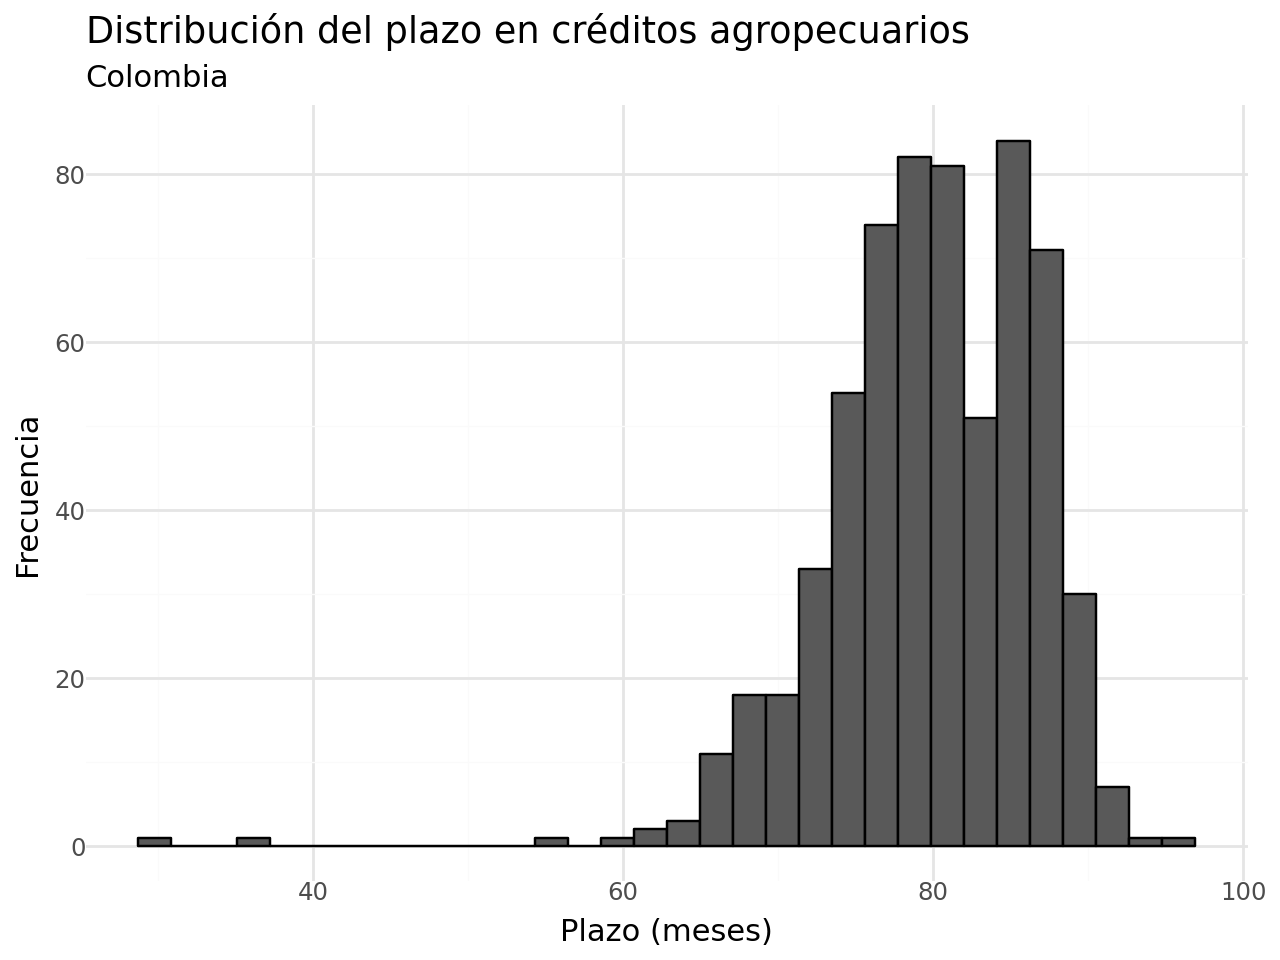

In [41]:
(
    df_completa >>
    ggplot(aes(x = "promedio_plazo")) +
    geom_histogram(color = "black") +
    labs(x = "Plazo (meses)",
         y = "Frecuencia",
         title = "Distribución del plazo en créditos agropecuarios",
         subtitle = "Colombia") +
    theme_minimal() 
)

- **Valor del crédito:**

c:\Users\edimer.david\AppData\Local\miniconda3\envs\semillero\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 66'. Pick better value with 'binwidth'.
c:\Users\edimer.david\AppData\Local\miniconda3\envs\semillero\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


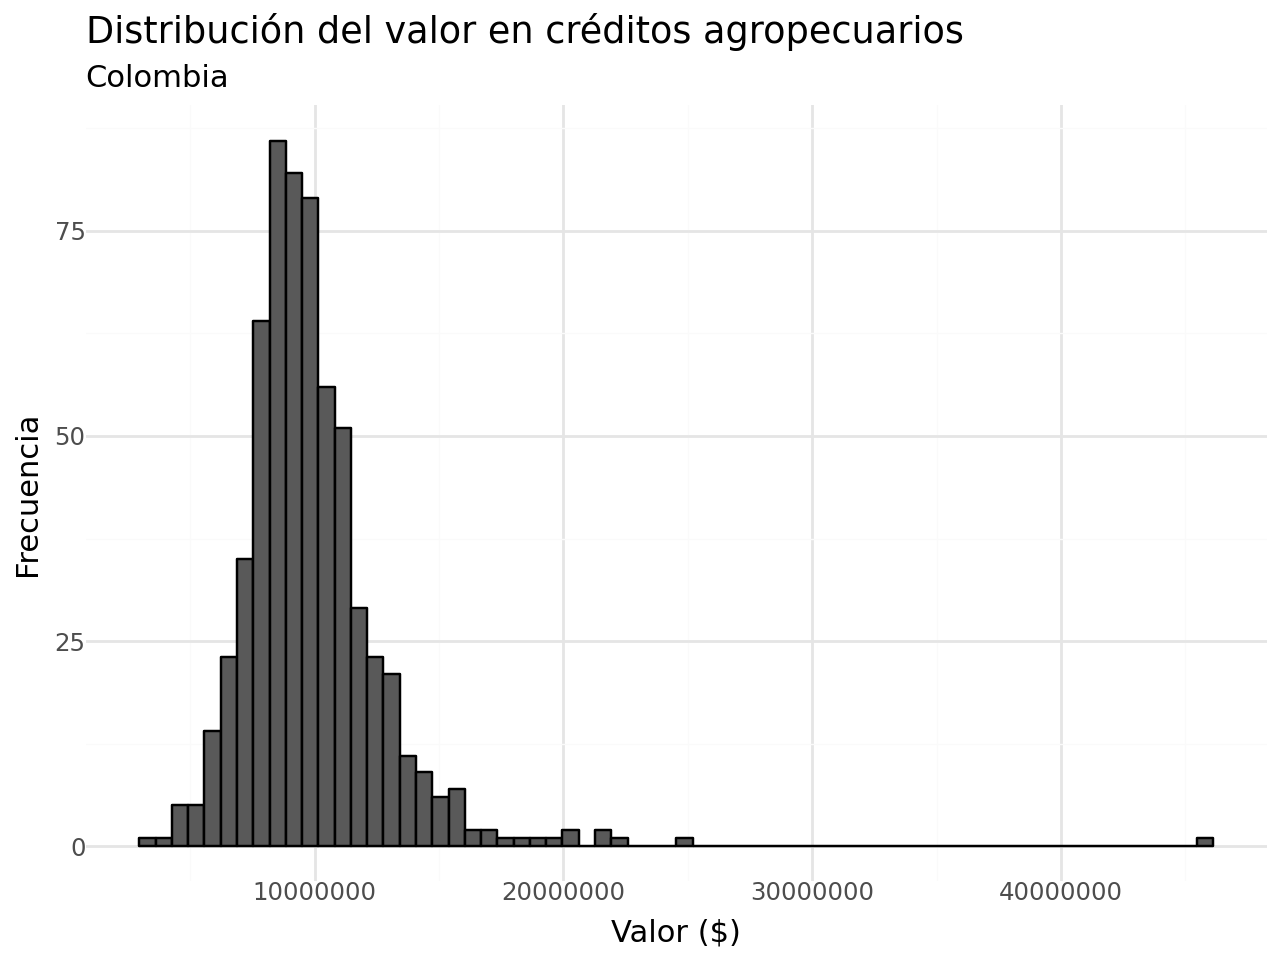

In [42]:
(
    df_completa >>
    ggplot(aes(x = "promedio_valor")) +
    geom_histogram(color = "black") +
    labs(x = "Valor ($)",
         y = "Frecuencia",
         title = "Distribución del valor en créditos agropecuarios",
         subtitle = "Colombia") +
    theme_minimal() 
)

- **Rendimiento del cultivo de café:**

c:\Users\edimer.david\AppData\Local\miniconda3\envs\semillero\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 30'. Pick better value with 'binwidth'.


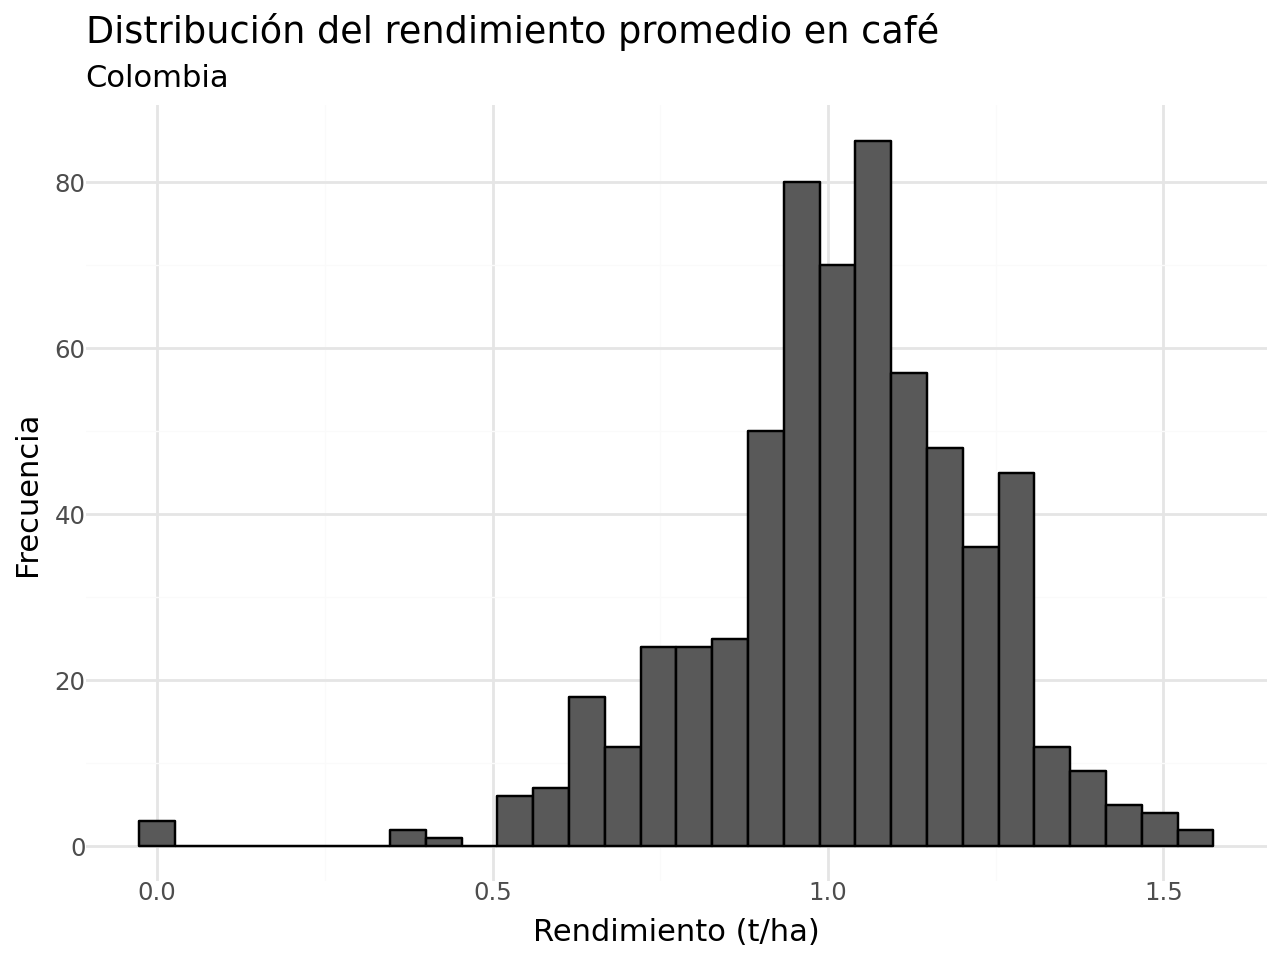

In [43]:
(
    df_completa >>
    ggplot(aes(x = "promedio_rto")) +
    geom_histogram(color = "black") +
    labs(x = "Rendimiento (t/ha)",
         y = "Frecuencia",
         title = "Distribución del rendimiento promedio en café",
         subtitle = "Colombia") +
    theme_minimal() 
)

- **Producción en toneladas del cultivo de café:**

c:\Users\edimer.david\AppData\Local\miniconda3\envs\semillero\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 72'. Pick better value with 'binwidth'.


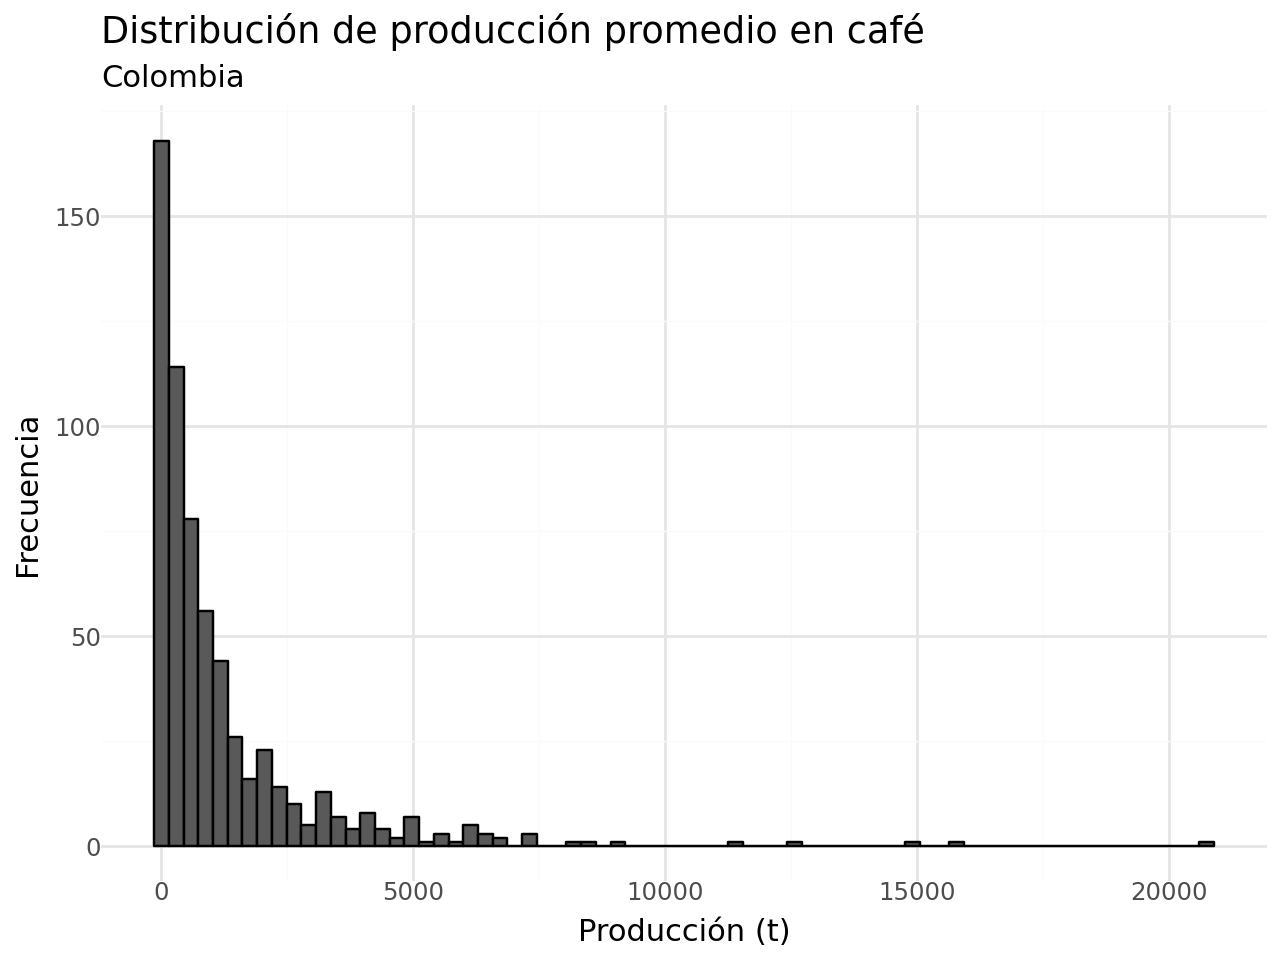

In [48]:
(
    df_completa >>
    ggplot(aes(x = "promedio_pdn")) +
    geom_histogram(color = "black") +
    labs(x = "Producción (t)",
         y = "Frecuencia",
         title = "Distribución de producción promedio en café",
         subtitle = "Colombia") +
    theme_minimal() 
)

## Distribución comparativa

- ¿En qué departamentos se solicita mayor monto de créditos?

c:\Users\edimer.david\AppData\Local\miniconda3\envs\semillero\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


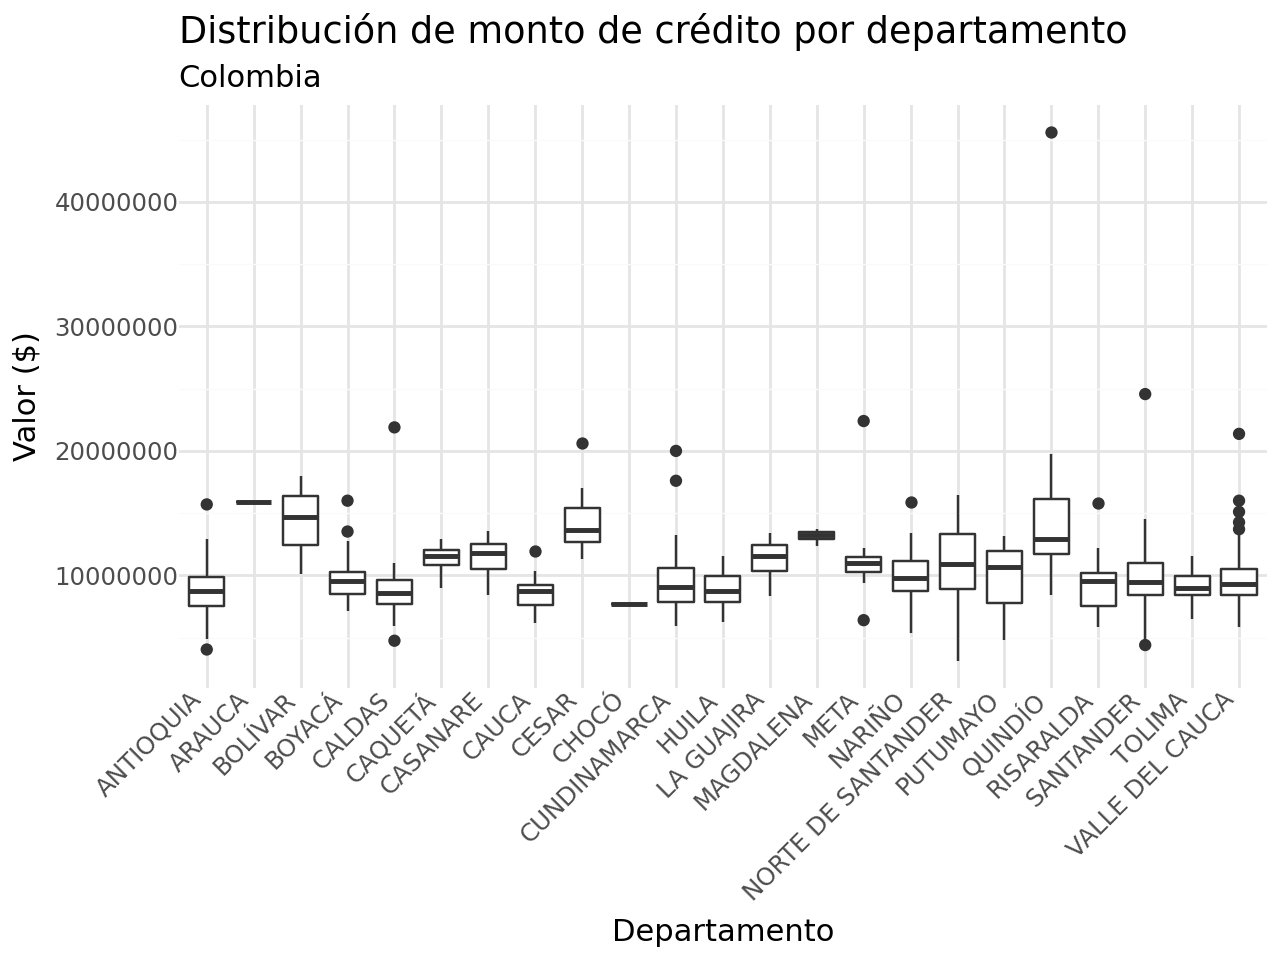

In [51]:
(
    df_completa >> 
    ggplot(aes(x = "departamento_inversion", y = "promedio_valor")) +
    geom_boxplot() +
    labs(x = "Departamento",
         y = "Valor ($)",
         title = "Distribución de monto de crédito por departamento",
         subtitle = "Colombia") +
    theme_minimal() +
    theme(axis_text_x = element_text(angle = 45, hjust = 1))
)

- ¿En qué departamentos hay mayores rendimientos?

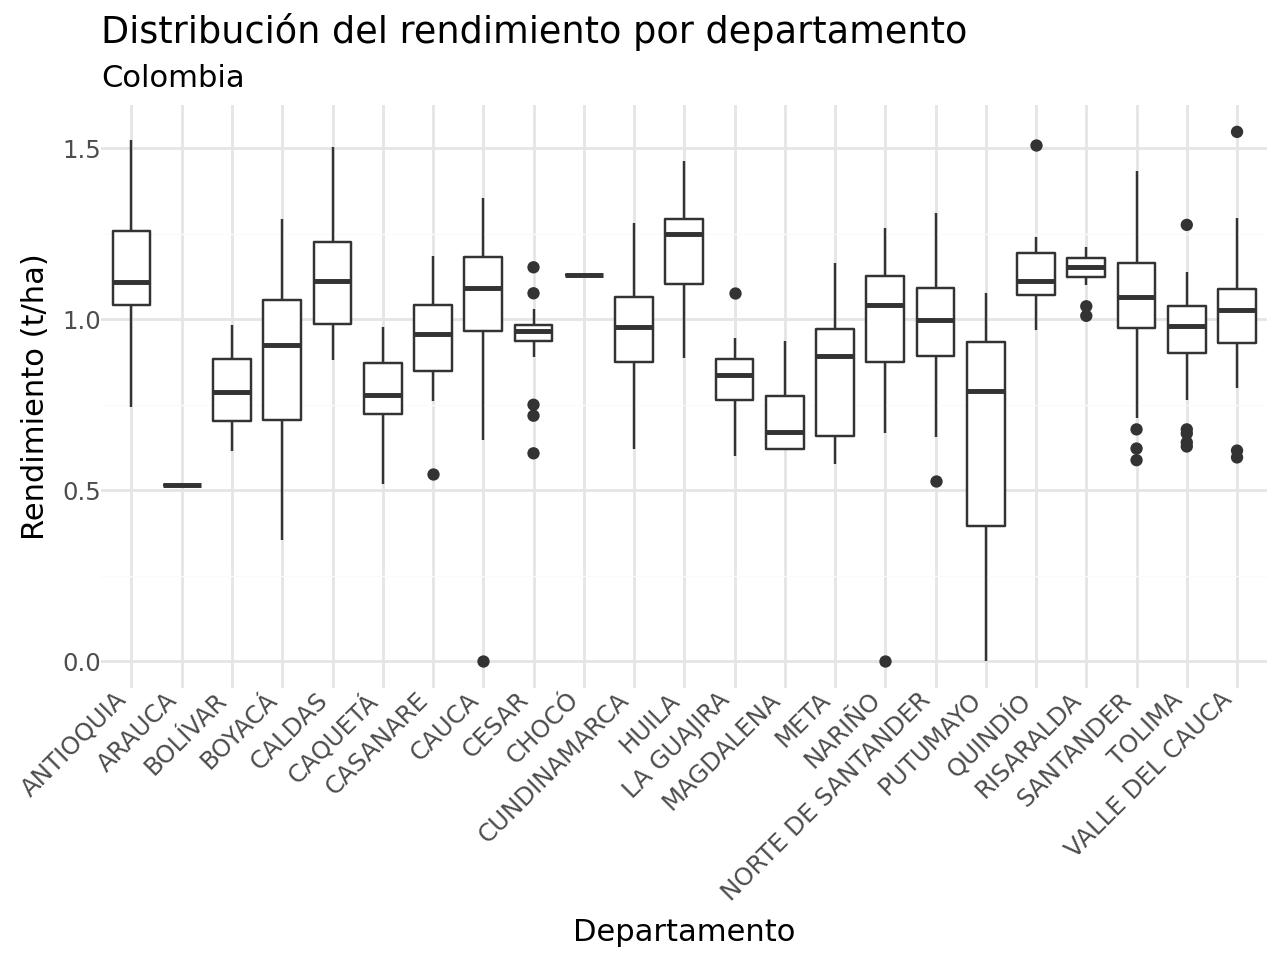

In [52]:
(
    df_completa >> 
    ggplot(aes(x = "departamento_inversion", y = "promedio_rto")) +
    geom_boxplot() +
    labs(x = "Departamento",
         y = "Rendimiento (t/ha)",
         title = "Distribución del rendimiento por departamento",
         subtitle = "Colombia") +
    theme_minimal() +
    theme(axis_text_x = element_text(angle = 45, hjust = 1))
)

## Monto vs rendimiento

- ¿Existe asociación entre el monto del crédito y el rendimiento?

In [54]:
df_completa[["promedio_valor", "promedio_rto"]].corr()

,promedio_valor,promedio_rto
promedio_valor,1.000000,-0.098442
promedio_rto,-0.098442,1.000000


- Graficamos el diagrama de dispersión:

c:\Users\edimer.david\AppData\Local\miniconda3\envs\semillero\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


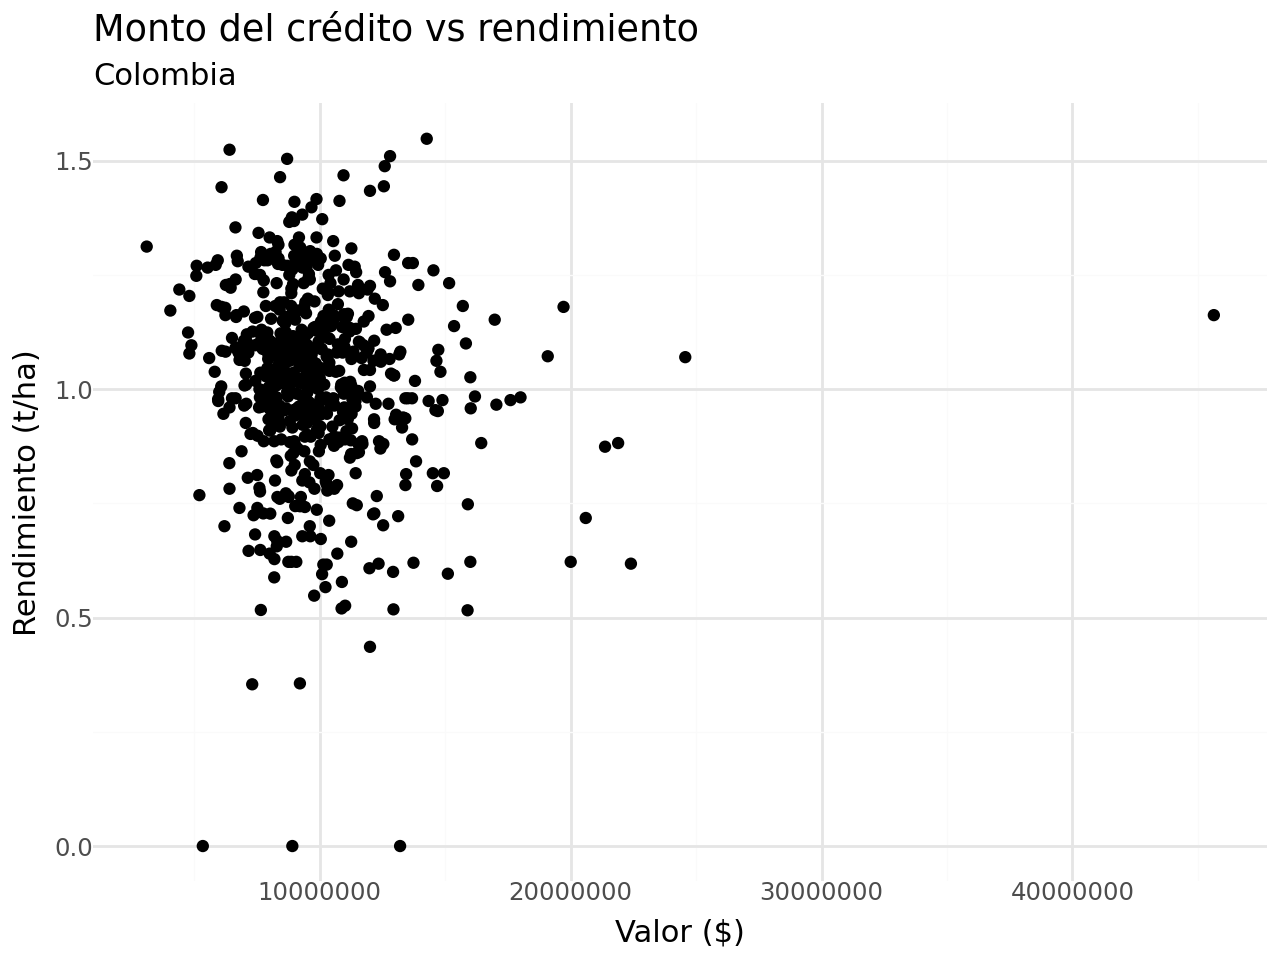

In [57]:
(
    
    df_completa >>
    # df_completa[df_completa["promedio_valor"] < 4e+07] >> 
    ggplot(aes(x = "promedio_valor", y = "promedio_rto")) +
    geom_point() +
    labs(x = "Valor ($)",
         y = "Rendimiento (t/ha)",
         title = "Monto del crédito vs rendimiento",
         subtitle = "Colombia") +
    theme_minimal()
)

## Monto vs producción

- Ahora relacionamos el valor del crédito con la producción:

In [58]:
df_completa[["promedio_valor", "promedio_pdn"]].corr()

,promedio_valor,promedio_pdn
promedio_valor,1.000000,-0.099401
promedio_pdn,-0.099401,1.000000


- Gráfico:

c:\Users\edimer.david\AppData\Local\miniconda3\envs\semillero\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


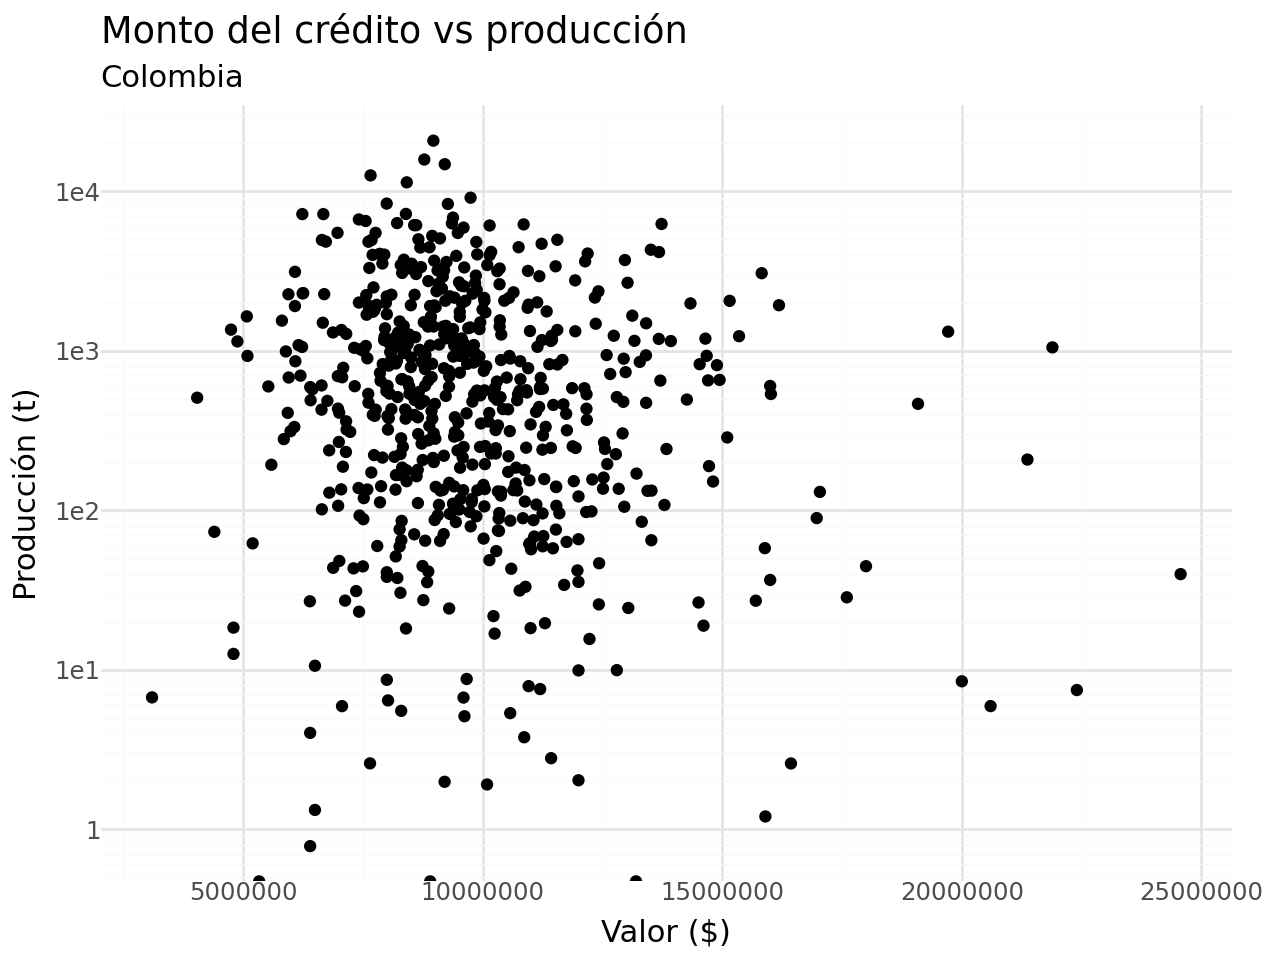

In [62]:
(
    
    # df_completa >>
    df_completa[df_completa["promedio_valor"] < 4e+07] >> 
    ggplot(aes(x = "promedio_valor", y = "promedio_pdn")) +
    geom_point() +
    labs(x = "Valor ($)",
         y = "Producción (t)",
         title = "Monto del crédito vs producción",
         subtitle = "Colombia") +
    theme_minimal() +
    scale_y_log10()
)

:::